In [1]:
# C:\Mark\uni\Uni Work\5th Year\Diss\ROC Surfaces\adni_noNA.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib notebook

# Alzheimers Data - Empirical

In [2]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')
df

,Unnamed: 0,RID,APOE4,MMSE,age,gender,educ,DX,abeta,tau,LeftHipp,RightHipp,Hipp,HCI
0,1,2002,0,28,65,1,16,2,293,254,3.919,4.041,7.960,8.5163
1,2,2002,0,28,65,1,16,2,293,254,3.803,4.033,7.836,8.5163
2,3,2010,1,30,63,2,20,2,444,729,4.045,3.957,8.002,4.9071
3,4,2010,1,30,63,2,20,2,444,729,4.001,4.003,8.004,4.9071
4,5,2018,0,29,76,2,18,2,500,559,3.789,3.965,7.754,8.7040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1030,5290,1,29,67,2,12,1,1808,1620,3.782,3.759,7.541,4.9309
1028,1031,5292,0,30,74,2,13,1,1850,1330,3.397,3.705,7.102,6.8485
1029,1032,5295,1,29,75,2,15,1,802,1792,2.657,3.271,5.928,18.9298
1030,1033,5296,0,29,69,1,14,1,270,569,5.140,5.392,10.532,10.1158


In [3]:
d1 = df[df['DX'] == 1]
d2 = df[df['DX'] == 2]
d3 = df[df['DX'] == 3]

In [4]:
def ROCSurfaceEmp(d1, d2, d3, marker, reverse=False, log=False):
    marker_1 = np.array(d1[marker])
    marker_2 = np.array(d2[marker])
    marker_3 = np.array(d3[marker])
    
    if log:
        marker_1 = np.log(marker_1)
        marker_2 = np.log(marker_2)
        marker_3 = np.log(marker_3)
    
    if reverse:
        marker_1 = [-i for i in marker_1]
        marker_2 = [-i for i in marker_2]
        marker_3 = [-i for i in marker_3]
    
    mu1d, sigma1d = np.mean(marker_1), np.std(marker_1)
    mu2d, sigma2d = np.mean(marker_2), np.std(marker_2)
    mu3d, sigma3d = np.mean(marker_3), np.std(marker_3)
    
    p1 = np.linspace(0,1,100)
    p3 = np.linspace(0,1,100)

    a = (mu3d - mu2d) / sigma2d
    b = sigma3d / sigma2d

    c = (mu1d - mu2d) / sigma2d
    d = sigma1d / sigma2d
    
    ecdf = ECDF(marker_2) 

    ROCsurface = []
    ROCsurface2 = []

    for i in p1:
        nowlist = []
        nowlist2 = []
        for j in p3:
            rocsurface_here = ecdf(np.quantile(marker_3, 1-j)) - ecdf(np.quantile(marker_1, i))

            if rocsurface_here >=0:
                nowlist.append(rocsurface_here)
                nowlist2.append(rocsurface_here)
            else:
                nowlist.append(0)
                nowlist2.append(np.nan)
                
        ROCsurface.append(nowlist)
        ROCsurface2.append(nowlist2)
        
    first = [ROCsurface[i][j] for i in range(100) for j in range(100)]
    VUS = np.nanmean(first)
    
    #ROCsurface2 = [np.nan if i == 0 else i for i in ROCsurface[j] for j in range(100)]
    
    return p1, ROCsurface, p3, VUS, ROCsurface2

## Tau

In [5]:
marker = 'tau'

x, Y, z, VUS, Y2 = ROCSurfaceEmp(d1, d2, d3, marker, log=False) 

<IPython.core.display.Javascript object>


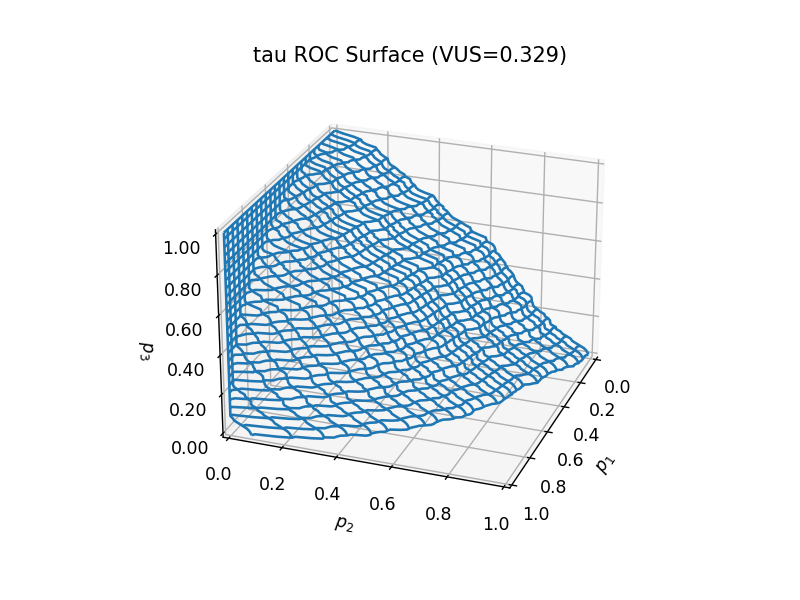

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Z = np.meshgrid(x, z)

surf = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_title(f"{marker} ROC Surface (VUS={round(VUS, 3)})")

ax.set_xlabel("$p_1$")
ax.set_xlim(0,1)

ax.set_ylabel("$p_2$")
ax.set_ylim(0,1)

ax.set_zlabel("$p_3$")
ax.set_zlim(0,1)

ax.view_init(elev=25, azim=20)

plt.show()

## Abeta

<IPython.core.display.Javascript object>


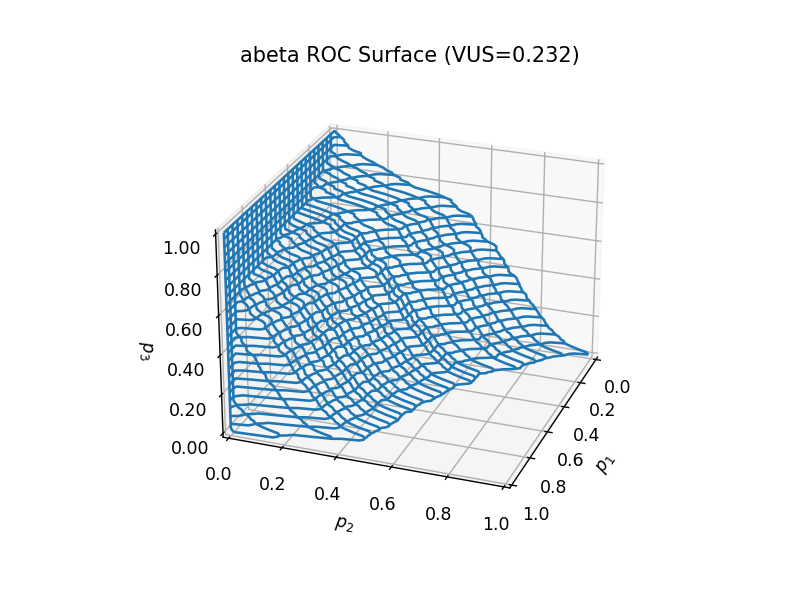

In [7]:
marker = 'abeta'

x, Y, z, VUS, Y2 = ROCSurfaceEmp(d1, d2, d3, marker, reverse=False) 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Z = np.meshgrid(x, z)

surf = ax.plot_wireframe(X, Y, Z, rstride= 4, cstride=4)

ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_title(f"{marker} ROC Surface (VUS={round(VUS, 3)})")

ax.set_xlabel("$p_1$")
ax.set_xlim(0,1)

ax.set_ylabel("$p_2$")
ax.set_ylim(0,1)

ax.set_zlabel("$p_3$")
ax.set_zlim(0,1)

ax.view_init(elev=25, azim=20)

plt.show()

## Hipp

<IPython.core.display.Javascript object>


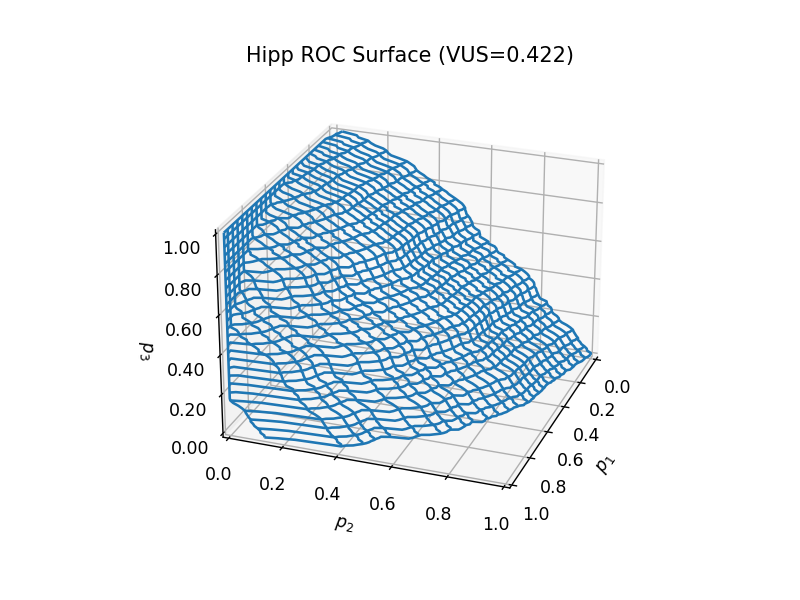

In [8]:
marker = 'Hipp'

x, Y, z, VUS, Y2 = ROCSurfaceEmp(d1, d2, d3, marker, reverse=True, log=False) 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Z = np.meshgrid(x, z)

surf = ax.plot_wireframe(X, Y, Z, rstride= 4, cstride=4)

ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_title(f"{marker} ROC Surface (VUS={round(VUS, 3)})")

ax.set_xlabel("$p_1$")
ax.set_xlim(0,1)

ax.set_ylabel("$p_2$")
ax.set_ylim(0,1)

ax.set_zlabel("$p_3$")
ax.set_zlim(0,1)

ax.view_init(elev=25, azim=20)

plt.show()

## HCI

<IPython.core.display.Javascript object>


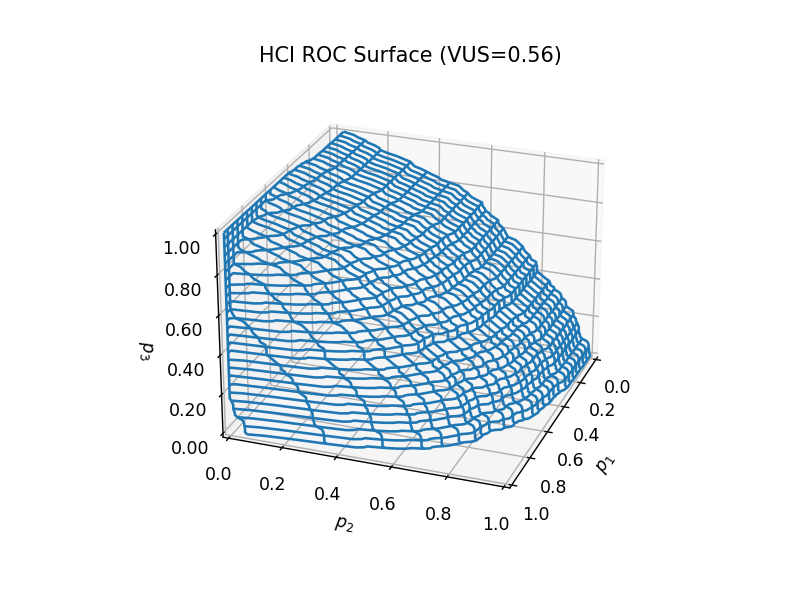

In [9]:
marker = 'HCI'

x, Y, z, VUS, Y2 = ROCSurfaceEmp(d1, d2, d3, marker, log=False) 

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X, Z = np.meshgrid(x, z)

surf = ax.plot_wireframe(X, Y, Z, rstride= 4, cstride=4)

ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_title(f"{marker} ROC Surface (VUS={round(VUS, 3)})")

ax.set_xlabel("$p_1$")
ax.set_xlim(0,1)

ax.set_ylabel("$p_2$")
ax.set_ylim(0,1)

ax.set_zlabel("$p_3$")
ax.set_zlim(0,1)

ax.view_init(elev=25, azim=20)

plt.show()

# Bootstrap

In [10]:
import random

marker='HCI'
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

print(df.shape[0])

data_len = df.shape[0]

VUSs = []
ROCs = []

n = 10

for i in range(n):
    
    if i % 2==0:
        print(f'{i}/{n} completed')
#     random_indices = [np.random.randint(0,data_len) for _ in range(data_len)]
#     random_data = df.loc[df.index[random_indices]]
    random_data = df.sample(n=data_len, replace=True)
    
    d1 = random_data[random_data['DX'] == 1]
    d2 = random_data[random_data['DX'] == 2]
    d3 = random_data[random_data['DX'] == 3]

    x, Y, z, VUS, Y2 = ROCSurfaceEmp(d1, d2, d3, marker, log=False)
    
    VUSs.append(VUS)
    ROCs.append([Y])

1032
0/10 completed
2/10 completed
4/10 completed
6/10 completed
8/10 completed


In [11]:
print(f'97.5% CI: {round(stats.mstats.mquantiles(VUSs,0.975)[0],4)}')
print(f'97.5% CI: {round(stats.mstats.mquantiles(VUSs,0.025)[0],4)}')

97.5% CI: 0.6177
97.5% CI: 0.5391


<IPython.core.display.Javascript object>


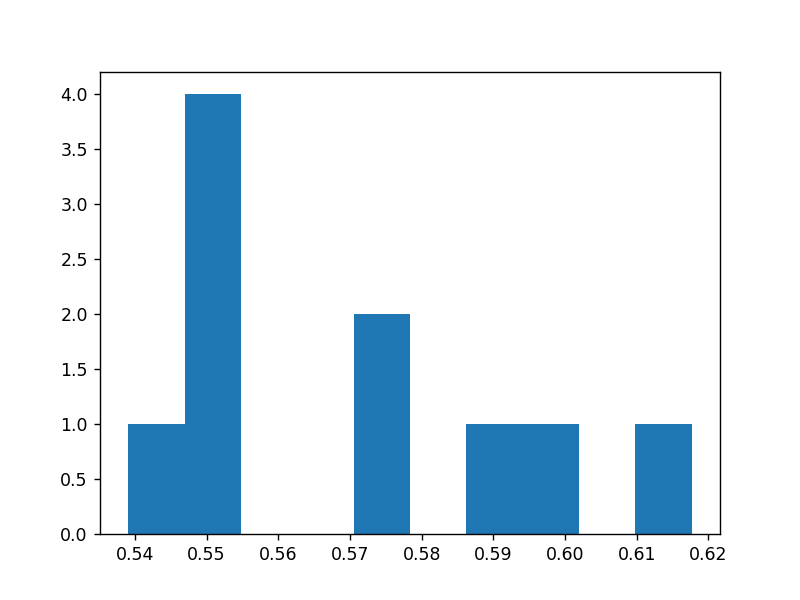

[0.5710809437386569, 0.5865954385964913, 0.5490373263888889, 0.6176807890222985, 0.552020284697509, 0.5715671768707482, 0.6019279264214047, 0.5522289608177172, 0.5390677361853833, 0.5480250871080139]


In [12]:
plt.hist(VUSs)
print(VUSs)
plt.show()

In [13]:
def BootstrapSurface(marker, n, df, log=False, reverse=False):
    data_len = df.shape[0]

    VUSs = []
    
    for i in range(n):
        
        if i % (n/10) ==0:
            print(f'{i}/{n} completed')
            
        random_data = df.sample(n=data_len, replace=True)

        d1 = random_data[random_data['DX'] == 1]
        d2 = random_data[random_data['DX'] == 2]
        d3 = random_data[random_data['DX'] == 3]

        x, Y, z, VUS, Y2 = ROCSurfaceEmp(d1, d2, d3, marker, log=log, reverse=reverse)

        VUSs.append(VUS)
        
    print(f'97.5% CI: {round(stats.mstats.mquantiles(VUSs,0.975)[0],4)}')
    print(f'2.5% CI: {round(stats.mstats.mquantiles(VUSs,0.025)[0],4)}')

#### Tau - Original VUS (0.329)

In [96]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

BootstrapSurface('tau', 100, df)

0/100 completed
97.5% CI: 0.3587
97.5% CI: 0.2857


#### Abeta - Original VUS (0.232)

In [97]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

BootstrapSurface('abeta', 100, df)

0/100 completed
97.5% CI: 0.265
97.5% CI: 0.2038


#### Hipp - Original VUS (0.422)

In [98]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

BootstrapSurface('Hipp', 100, df, reverse=True)

0/100 completed
97.5% CI: 0.4559
97.5% CI: 0.3814


#### HCI - Original VUS (0.56)

In [99]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

BootstrapSurface('HCI', 100, df)

0/100 completed
97.5% CI: 0.5942
97.5% CI: 0.5137


# Youden Index


In [2]:
def YoudenIndex(d1, d2, d3, marker, reverse=False, log=False, gridsize=100):
    """
    Calculates the YI at each point on the surface and returns an array with elements [p, q, YI_i] where
    p =p_1, 1=p_3 is a point on the surface and YI_i is the YI at that point
    
    """
    marker_1 = np.array(d1[marker])
    marker_2 = np.array(d2[marker])
    marker_3 = np.array(d3[marker])
    
    if log:
        marker_1 = np.log(marker_1)
        marker_2 = np.log(marker_2)
        marker_3 = np.log(marker_3)
    
    if reverse:
        marker_1 = [-i for i in marker_1]
        marker_2 = [-i for i in marker_2]
        marker_3 = [-i for i in marker_3]
    
    p1 = np.linspace(0,1,gridsize)
    p3 = np.linspace(0,1,gridsize)
    
    ecdf1 = ECDF(marker_1) 
    ecdf2 = ECDF(marker_2) 
    ecdf3 = ECDF(marker_3) 

    YI = np.array([[0,0,0]])

    for i in p1:
        for j in p3:
            c1 = np.quantile(marker_1, i)
            c2 = np.quantile(marker_3, 1-j)
            
            if c1 < c2:
                YI_here = ecdf1(c1) + ecdf2(c2) - ecdf2(c1) - ecdf3(c2)
                YI = np.vstack((YI, np.array([i, j, YI_here])))
            else:
                YI = np.vstack((YI, np.array([i, j, -9999])))

    max_YI_index = np.argmax(YI, axis=0)[2]
    
    max_p1 = YI[max_YI_index, 0]
    max_p3 = YI[max_YI_index, 1]
    max_YI = YI[max_YI_index, 2]
    
    best_c1 = np.quantile(marker_1, max_p1)
    best_c2 = np.quantile(marker_3, 1-max_p3)

    return YI, max_YI, max_p1, max_p3, best_c1, best_c2

In [18]:
def do_YI(marker, reverse=False, hist=False):
    """
    This function plots histograms of the marker, alongside the thresholds given by the youden index
    It also returns the values
    
    """
    df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

    d1 = df[df['DX'] == 1]
    d2 = df[df['DX'] == 2]
    d3 = df[df['DX'] == 3]

    YI, max_YI, max_p1, max_p3, best_c1, best_c2 = YoudenIndex(d1, d2, d3, marker, reverse=reverse)

    if hist:
        plt.figure()
        #plt.style.use('seaborn-deep')
        
        toplotd1 = d1[marker]
        toplotd2 = d2[marker]
        toplotd3 = d3[marker]
        
        mu1d, sigma1d = np.mean(toplotd1), np.std(toplotd1)
        mu2d, sigma2d = np.mean(toplotd2), np.std(toplotd2)
        mu3d, sigma3d = np.mean(toplotd3), np.std(toplotd3)
        
        plt.hist([toplotd1, toplotd2, toplotd3], label=['class 1', 'class 2', 'class3'])

        xmin, xmax, ymin, ymax = plt.axis()
        x = np.linspace(xmin, xmax, 100)
        
        p1 = stats.norm.pdf(x, (mu1d), (sigma1d))
        p2 = stats.norm.pdf(x, (mu2d), (sigma2d))
        p3 = stats.norm.pdf(x, (mu3d), (sigma3d))
        
        plt.plot(x, p1, 'b', label='Class 1')
        plt.plot(x, p2, 'r', label='Class 2')
        plt.plot(x, p3, 'g', label='Class 3')
        
        if reverse:
            plt.plot(-best_c1*np.ones(2),np.linspace(ymin,ymax,2),'k--')
            plt.plot(-best_c2*np.ones(2),np.linspace(ymin,ymax,2),'k--')
        else:
            plt.plot(best_c1*np.ones(2),np.linspace(ymin,ymax,2),'k--')
            plt.plot(best_c2*np.ones(2),np.linspace(ymin,ymax,2),'k--')
            
        plt.title(marker)
        plt.xlabel('Marker Value')
        plt.ylabel('Count')
        plt.legend()
    
    return max_YI, max_p1, max_p3, best_c1, best_c2

In [3]:
def do_YI_KDE(marker, reverse=False, hist=False, bins=1000):
    """
    This function plots gaussian kernel density estimates of the marker, alongside the thresholds given by the youden index
    It also returns the values
    
    """
    df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

    d1 = df[df['DX'] == 1]
    d2 = df[df['DX'] == 2]
    d3 = df[df['DX'] == 3]

    YI, max_YI, max_p1, max_p3, best_c1, best_c2 = YoudenIndex(d1, d2, d3, marker, reverse=reverse)

    if hist:
        fig, ax = plt.subplots(1,1)
                
        x1 = d1[marker]
        x2 = d2[marker]
        x3 = d3[marker]

        x_d = np.linspace(min(min(x1), min(x2), min(x3)), max(max(x1), max(x2), max(x3)), bins)
        density1 = sum(stats.norm(xi).pdf(x_d) for xi in x1)
        density2 = sum(stats.norm(xi).pdf(x_d) for xi in x2)
        density3 = sum(stats.norm(xi).pdf(x_d) for xi in x3)

        ax.fill_between(x_d, density1, alpha=0.5, label='class 1')
        ax.fill_between(x_d, density2, alpha=0.5, label='class 2')
        ax.fill_between(x_d, density3, alpha=0.5, label='class 3')

        xmin, xmax, ymin, ymax = ax.axis()
        x = np.linspace(xmin, xmax, 100)
        
        if reverse:
            ax.plot(-best_c1*np.ones(2),np.linspace(ymin,ymax,2),'k--')
            ax.plot(-best_c2*np.ones(2),np.linspace(ymin,ymax,2),'k--')
        else:
            ax.plot(best_c1*np.ones(2),np.linspace(ymin,ymax,2),'k--')
            ax.plot(best_c2*np.ones(2),np.linspace(ymin,ymax,2),'k--')
            
            
        ax.tick_params(left = False, right = False , labelleft = False, labelbottom=True)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        #ax.title(marker)
        ax.set_xlabel('Marker Value')
        ax.set_ylabel('Density')
        ax.legend()
    
    return max_YI, max_p1, max_p3, best_c1, best_c2

In [79]:
def do_YIHCI(marker='HCI', reverse=False, hist=False):
    """
    This function plots the normally distributed estimate of the HCI marker, alongside the 
    thresholds given by the youden index. It also returns the values
    
    This creates the picture used in the diss.
    
    """
    df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

    d1 = df[df['DX'] == 1]
    d2 = df[df['DX'] == 2]
    d3 = df[df['DX'] == 3]

    YI, max_YI, max_p1, max_p3, best_c1, best_c2 = YoudenIndex(d1, d2, d3, marker, reverse=reverse)

    if hist:
        plt.figure()
        #plt.style.use('seaborn-deep')
        
        toplotd1 = d1[marker]
        toplotd2 = d2[marker]
        toplotd3 = d3[marker]
        
        mu1d, sigma1d = np.mean(toplotd1), np.std(toplotd1)
        mu2d, sigma2d = np.mean(toplotd2), np.std(toplotd2)
        mu3d, sigma3d = np.mean(toplotd3), np.std(toplotd3)
        
        #plt.hist([toplotd1, toplotd2, toplotd3], label=['class 1', 'class 2', 'class3'])

        plt.xlim(0,40)
        plt.ylim(0,0.12)
        xmin, xmax, ymin, ymax = plt.axis()
        x = np.linspace(xmin, xmax, 100)
        
        p1 = stats.norm.pdf(x, (mu1d), (sigma1d))
        p2 = stats.norm.pdf(x, (mu2d), (sigma2d))
        p3 = stats.norm.pdf(x, (mu3d), (sigma3d))
        
        plt.plot(x, p1, 'b', label='Class 1')
        plt.plot(x, p2, 'r', label='Class 2')
        plt.plot(x, p3, 'g', label='Class 3')
        
        if reverse:
            plt.plot(-best_c1*np.ones(2),np.linspace(ymin,ymax,2),'k--')
            plt.plot(-best_c2*np.ones(2),np.linspace(ymin,ymax,2),'k--')
        else:
            plt.plot(best_c1*np.ones(2),np.linspace(ymin,ymax,2),'k--')
            plt.plot(best_c2*np.ones(2),np.linspace(ymin,ymax,2),'k--')
            
        plt.title(marker)
        plt.xlabel('Marker Value')
        plt.ylabel('Count')
        plt.legend()
    
    return max_YI, max_p1, max_p3, best_c1, best_c2

<IPython.core.display.Javascript object>


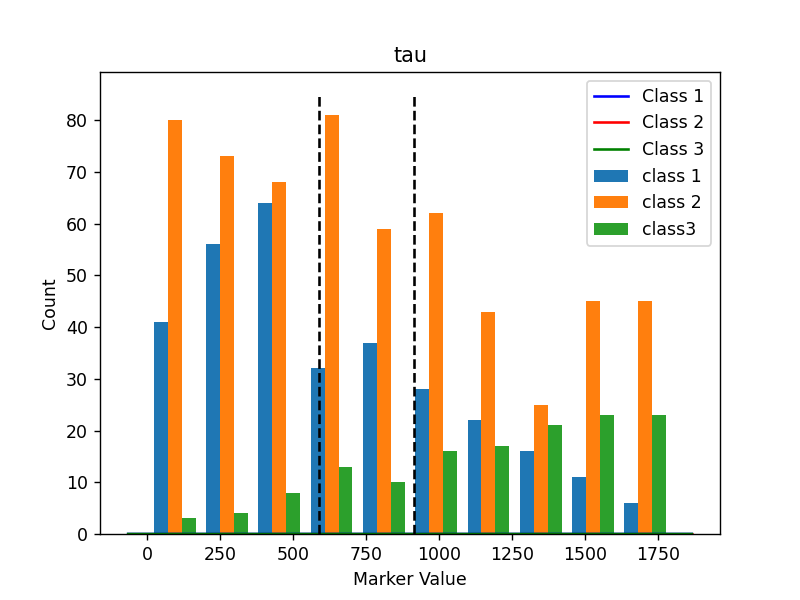

0.4975489041674605 0.5454545454545455 0.7171717171717172 588.0 915.4949494949494


In [20]:
max_YI, max_p1, max_p3, best_c1, best_c2 = do_YI('tau', hist=True)
print(max_YI, max_p1, max_p3, best_c1, best_c2)

<IPython.core.display.Javascript object>


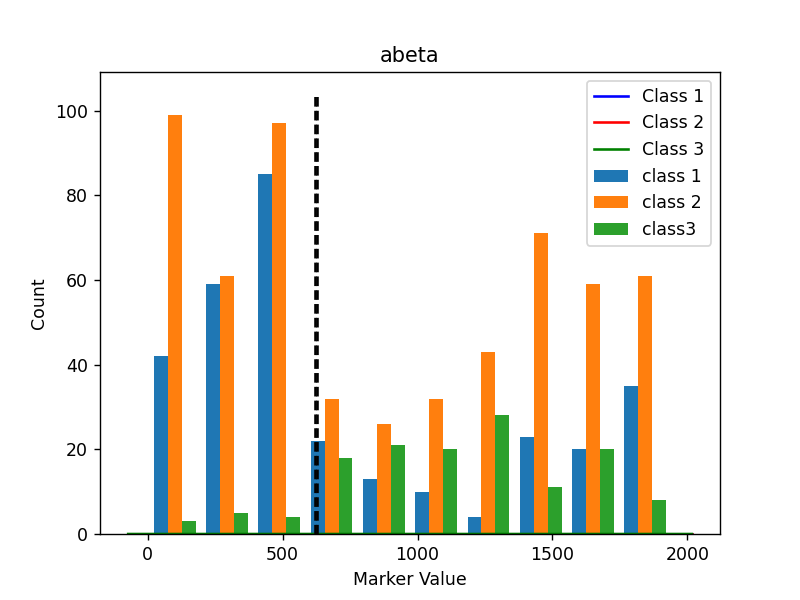

0.5281911484965123 0.6262626262626263 0.8989898989898991 620.0909090909092 628.2222222222221


In [25]:
max_YI, max_p1, max_p3, best_c1, best_c2 = do_YI('abeta', hist=True)
print(max_YI, max_p1, max_p3, best_c1, best_c2)

<IPython.core.display.Javascript object>


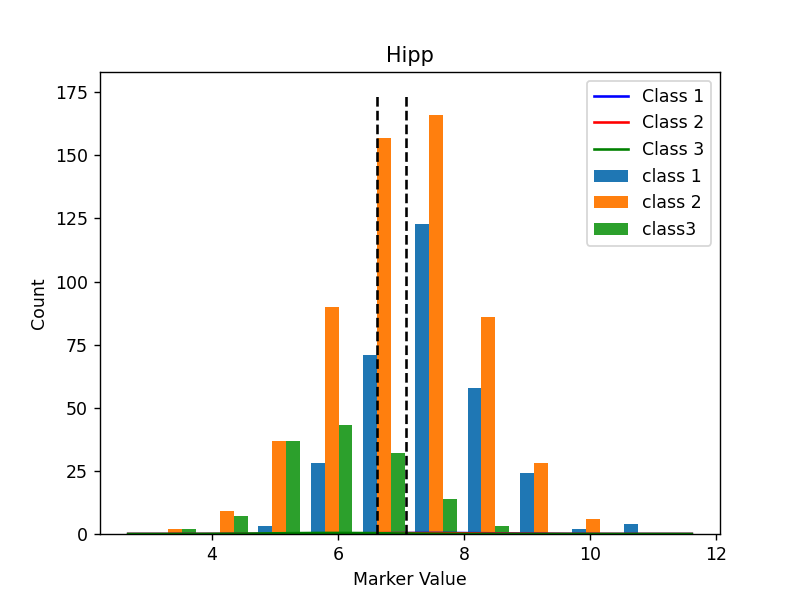

0.6549091211351868 0.7070707070707072 0.7676767676767677 -7.081363636363636 -6.61720202020202


In [26]:
max_YI, max_p1, max_p3, best_c1, best_c2 = do_YI('Hipp', reverse=True, hist=True)
print(max_YI, max_p1, max_p3, best_c1, best_c2)

<IPython.core.display.Javascript object>


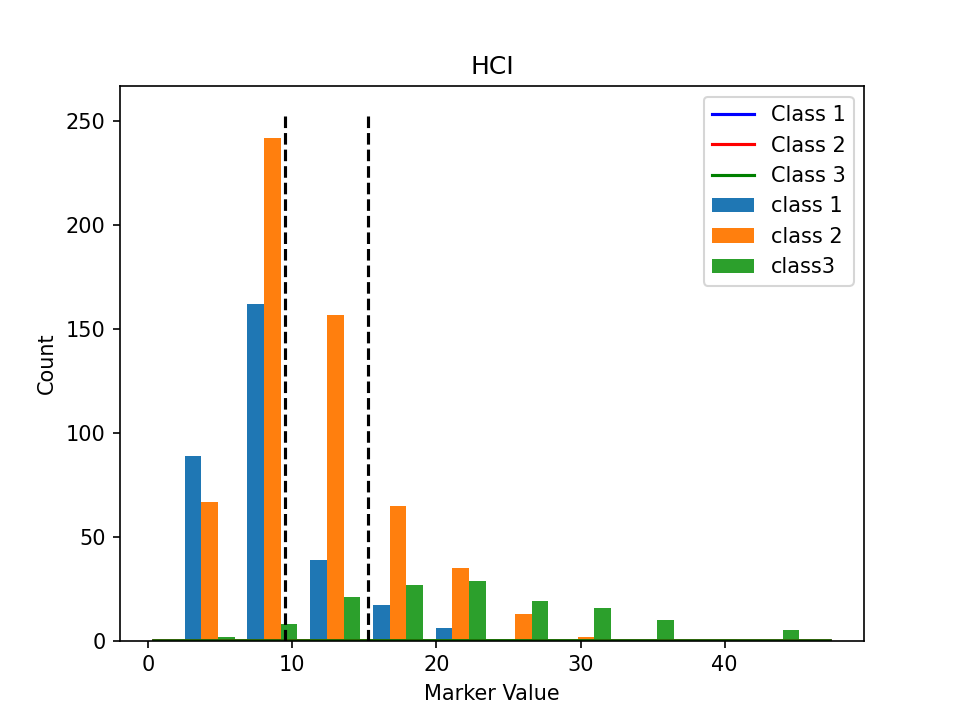

0.8878652745245662 0.7272727272727273 0.7777777777777778 9.518636363636364 15.256477777777777


In [33]:
max_YI, max_p1, max_p3, best_c1, best_c2 = do_YI('HCI', hist=True)
print(max_YI, max_p1, max_p3, best_c1, best_c2)

<IPython.core.display.Javascript object>


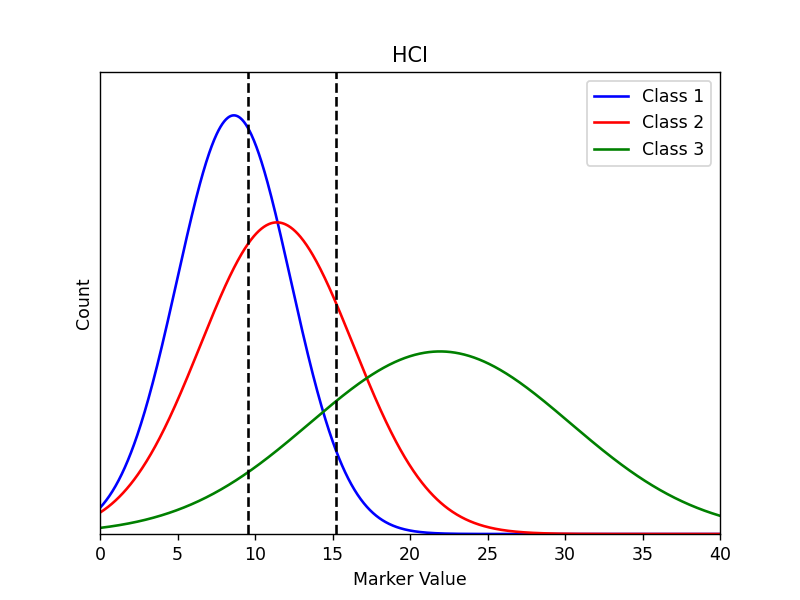

AttributeError: module 'matplotlib.pyplot' has no attribute 'spines'

In [90]:
max_YI, max_p1, max_p3, best_c1, best_c2 = do_YIHCI('HCI', hist=True)

plt.tick_params(left = False, right = False , labelleft = False, labelbottom=True)
plt.spines['right'].set_visible(False)
plt.spines['top'].set_visible(False)
plt.spines['left'].set_visible(False)
print(max_YI, max_p1, max_p3, best_c1, best_c2)

<IPython.core.display.Javascript object>


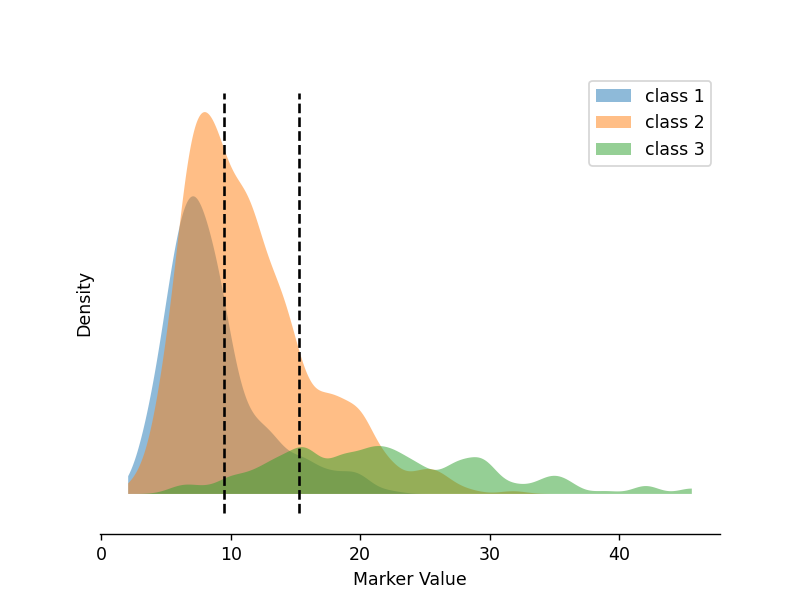

<IPython.core.display.Javascript object>


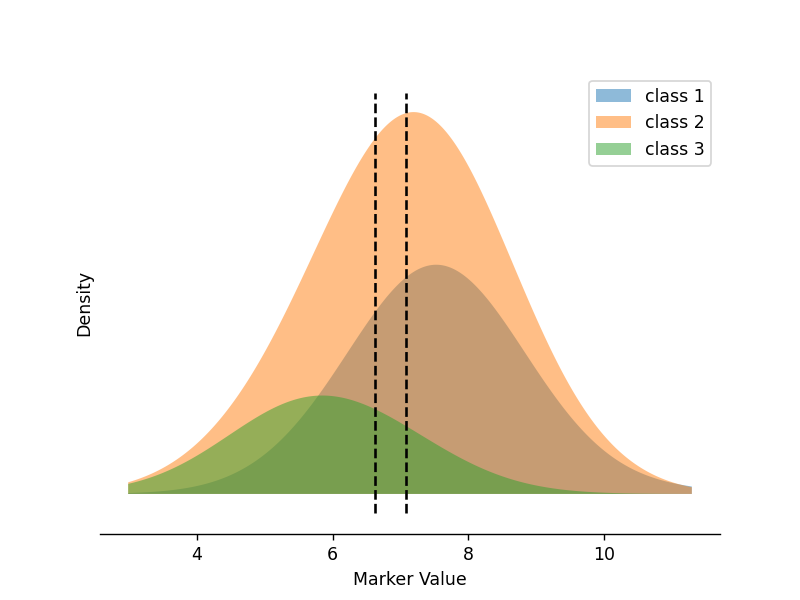

(0.6549091211351868,
 0.7070707070707072,
 0.7676767676767677,
 -7.081363636363636,
 -6.61720202020202)

In [97]:
#do_YI_KDE('tau', reverse=False, hist=True, bins=10)
#do_YI_KDE('abeta', reverse=False, hist=True, bins=10)
do_YI_KDE('HCI', reverse=False, hist=True)
do_YI_KDE('Hipp', reverse=True, hist=True)

# Youden Bootstrap

In [6]:
def Youden_bootstrap(n, df, marker, reverse=False, gridsize=100):
    
    best_c1s = []
    best_c2s = []
    
    data_len = df.shape[0]
    
    for i in range(n):
        rdf = df.sample(n=data_len, replace=True)

        d1 = rdf[rdf['DX'] == 1]
        d2 = rdf[rdf['DX'] == 2]
        d3 = rdf[rdf['DX'] == 3]
        
        YI, max_YI, max_p1, max_p3, best_c1, best_c2 = YoudenIndex(d1, d2, d3, marker, reverse=reverse, gridsize=gridsize)
    
        best_c1s.append(best_c1)
        best_c2s.append(best_c2)
        if i % 30 == 0:
            print(i)
        
    print(f'c1 97.5% CI: {round(stats.mstats.mquantiles(best_c1s,0.975)[0],4)}')
    print(f'c1  2.5% CI: {round(stats.mstats.mquantiles(best_c1s,0.025)[0],4)}')
    
    print(f'c2 97.5% CI: {round(stats.mstats.mquantiles(best_c2s,0.975)[0],4)}')
    print(f'c2  2.5% CI: {round(stats.mstats.mquantiles(best_c2s,0.025)[0],4)}')

In [117]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

Youden_bootstrap(500, df, 'tau', gridsize=100)

0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
c1 97.5% CI: 897.0
c1  2.5% CI: 516.7721
c2 97.5% CI: 1104.1139
c2  2.5% CI: 639.905


In [7]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

Youden_bootstrap(500, df, 'abeta', gridsize=100)

0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
c1 97.5% CI: 660.5591
c1  2.5% CI: 508.0
c2 97.5% CI: 697.4932
c2  2.5% CI: 587.0


In [9]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

Youden_bootstrap(500, df, 'HCI')

0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
c1 97.5% CI: 10.6648
c1  2.5% CI: 7.8404
c2 97.5% CI: 17.6232
c2  2.5% CI: 12.7626


In [10]:
df = pd.read_csv('C:\\Mark\\uni\\Uni Work\\5th Year\\Diss\\ROC Surfaces\\adni_noNA.csv')

Youden_bootstrap(500, df, 'Hipp', reverse=True)

0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
c1 97.5% CI: -6.601
c1  2.5% CI: -7.133
c2 97.5% CI: -6.0925
c2  2.5% CI: -6.866


# Experiment - Distrributions

<IPython.core.display.Javascript object>


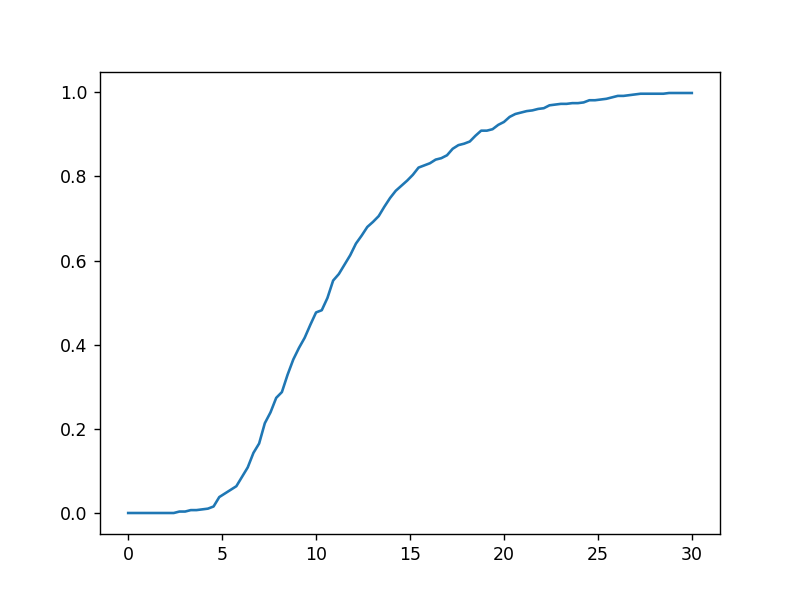

<IPython.core.display.Javascript object>


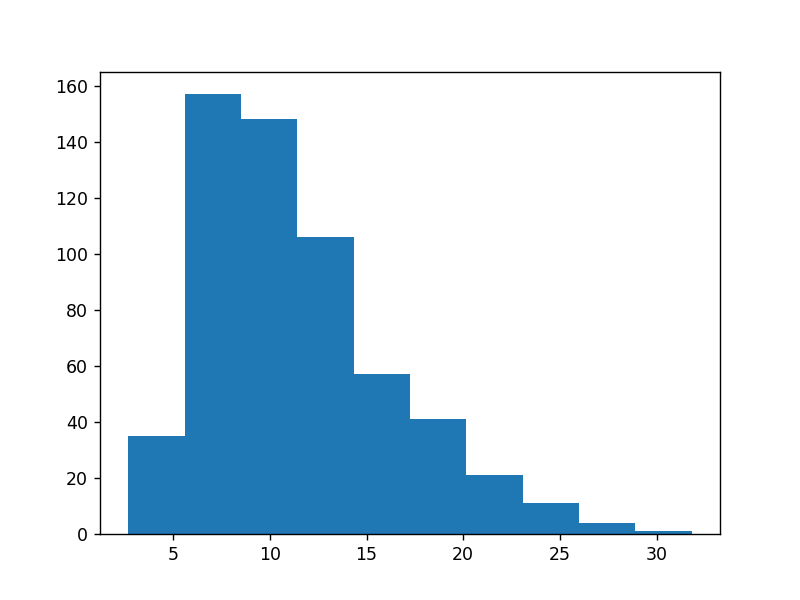

(array([ 35., 157., 148., 106.,  57.,  41.,  21.,  11.,   4.,   1.]),
 array([ 2.676  ,  5.59044,  8.50488, 11.41932, 14.33376, 17.2482 ,
        20.16264, 23.07708, 25.99152, 28.90596, 31.8204 ]),
 <BarContainer object of 10 artists>)

In [31]:
marker='HCI'

marker_1 = np.array(d1[marker])
marker_2 = np.array(d2[marker])
marker_3 = np.array(d3[marker])

log=False
if log:
    marker_1 = np.log(marker_1)
    marker_2 = np.log(marker_2)
    marker_3 = np.log(marker_3)

reverse=False
if reverse:
    marker_1 = [-i for i in marker_1]
    marker_2 = [-i for i in marker_2]
    marker_3 = [-i for i in marker_3]

mu1d, sigma1d = np.mean(marker_1), np.std(marker_1)
mu2d, sigma2d = np.mean(marker_2), np.std(marker_2)
mu3d, sigma3d = np.mean(marker_3), np.std(marker_3)

p1 = np.linspace(0,1,100)
p3 = np.linspace(0,1,100)

a = (mu3d - mu2d) / sigma2d
b = sigma3d / sigma2d

c = (mu1d - mu2d) / sigma2d
d = sigma1d / sigma2d

ecdf = ECDF(marker_2) 
x = np.linspace(0,30,100)

plt.plot(x, ecdf(x))
plt.show()

plt.figure()
plt.hist(marker_2)

# ROCsurface = []
# ROCsurface2 = []

# for i in p1:
#     nowlist = []
#     nowlist2 = []
#     for j in p3:
#         rocsurface_here = ecdf(a + b * np.quantile(marker_3, 1-j)) - ecdf(c + d * np.quantile(marker_1, i))

#         if rocsurface_here >=0:
#             nowlist.append(rocsurface_here)
#             nowlist2.append(rocsurface_here)
#         else:
#             nowlist.append(0)
#             nowlist2.append(np.nan)
#     ROCsurface.append(nowlist)
#     ROCsurface2.append(nowlist2)

# first = [ROCsurface[i][j] for i in range(100) for j in range(100)]
# VUS = np.nanmean(first)

<IPython.core.display.Javascript object>


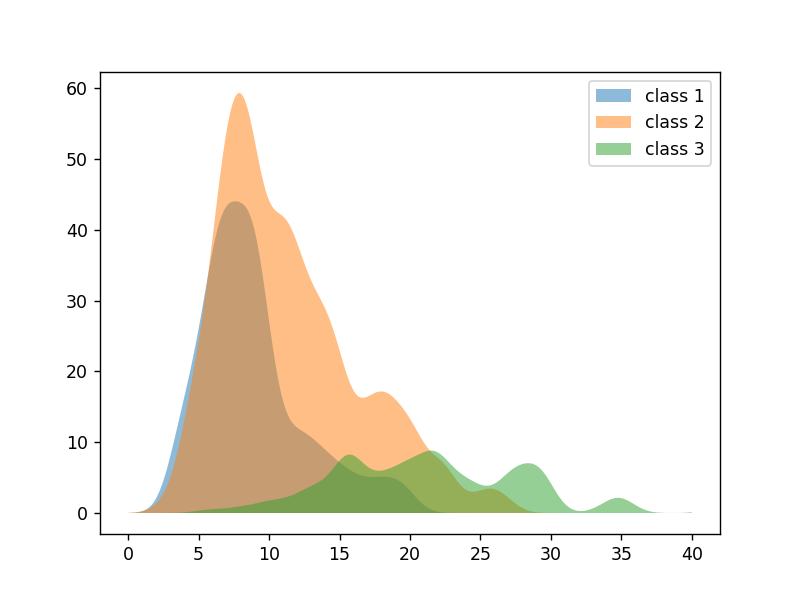

In [49]:
x1 = d1['HCI']
x2 = d2['HCI']
x3 = d3['HCI']

x_d = np.linspace(0, 40, 1000)
density1 = sum(stats.norm(xi).pdf(x_d) for xi in x1)
density2 = sum(stats.norm(xi).pdf(x_d) for xi in x2)
density3 = sum(stats.norm(xi).pdf(x_d) for xi in x3)

plt.fill_between(x_d, density1, alpha=0.5, label='class 1')
plt.fill_between(x_d, density2, alpha=0.5, label='class 2')
plt.fill_between(x_d, density3, alpha=0.5, label='class 3')

plt.legend()
plt.show()
